In [1]:
! pip install gym
! pip install stable-baselines3 torch


     -------------------------------------- 721.7/721.7 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827634 sha256=0cc9a71de4e3969097a2a07b0cceeda50da8e5b5a046e3672920ef054f10310c
  Stored in directory: c:\users\msi\appdata\local\pip\cache\wheels\af\2b\30\5e78b8b9599f2a2286a582b8da80594f654bf0e18d825a4405
Successfully built gym



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 181.7/181.7 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 953.9/953.9 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
! pip install shimmy


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip install mplfinance

     ---------------------------------------- 75.0/75.0 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import gym
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CheckpointCallback, EvalCallback
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifierCV
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [274]:


# Define the ticker symbol and the time frame
ticker_symbol = 'AMZN'  # Example for Apple Inc.
start_date = '2010-01-01'
end_date = '2023-12-28'

# Fetch the historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


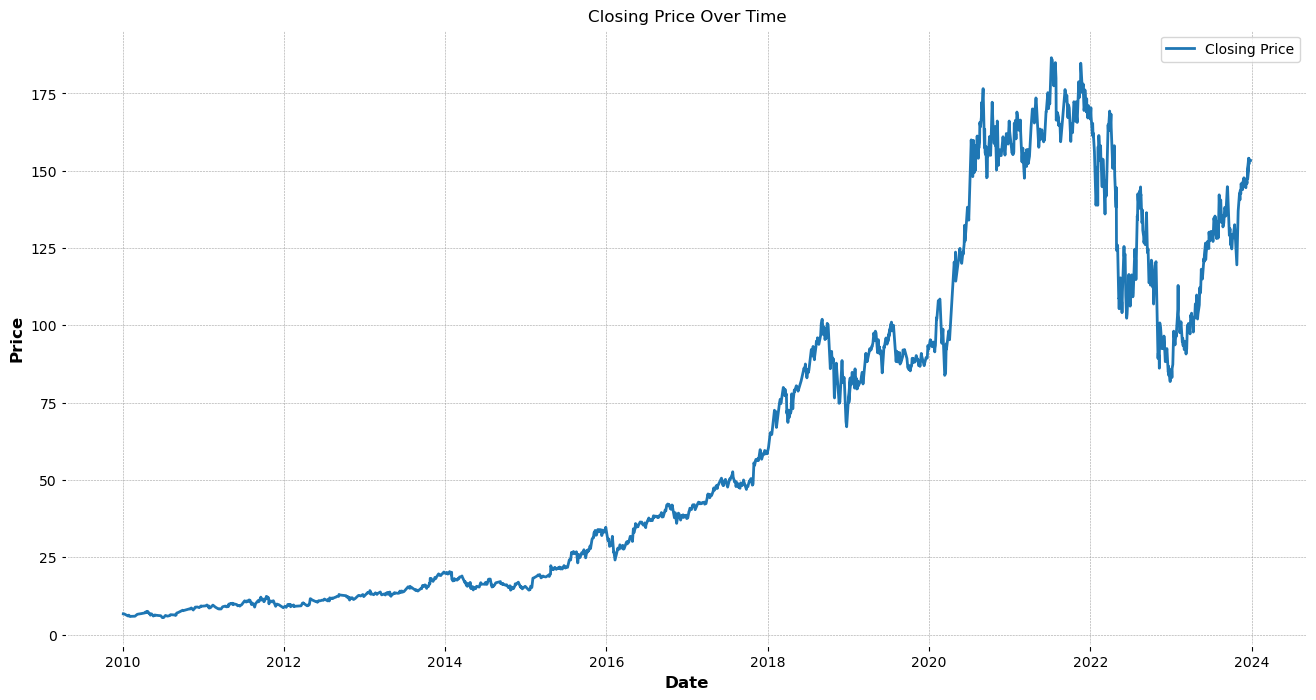

In [275]:


plt.figure(figsize=(16, 8))
plt.plot(data['Close'], label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


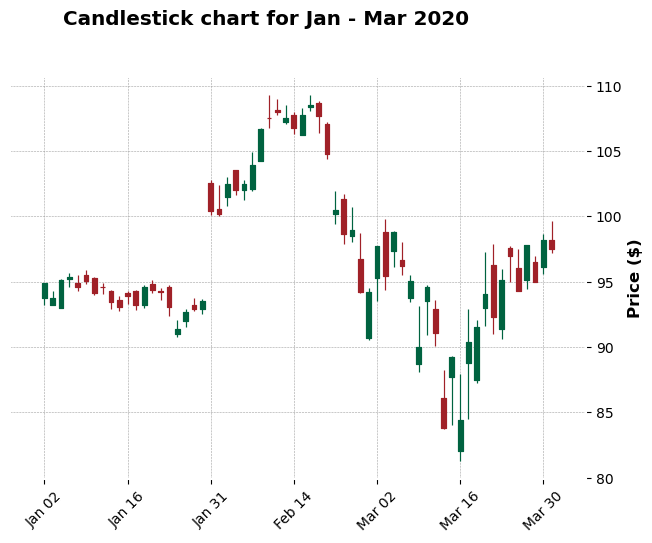

In [276]:


# Select a smaller time window for clarity
candlestick_data = data['2020-01-01':'2020-03-31']

# Plotting the candlestick chart
mpf.plot(candlestick_data, type='candle', style='charles',
         title='Candlestick chart for Jan - Mar 2020',
         ylabel='Price ($)')


In [277]:
# Calculate the 20-period Simple Moving Average
data['SMA'] = data['Close'].rolling(window=5).mean()
# Calculate the daily price changes
delta = data['Close'].diff()

# Make two series: one for gains and one for losses
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)

# Calculate the rolling average of gains and losses
roll_up = gain.rolling(window=14).mean()
roll_down = loss.rolling(window=14).mean()

# Calculate the Relative Strength (RS)
RS = roll_up / roll_down

# Calculate the Relative Strength Index (RSI)
data['RSI'] = 100.0 - (100.0 / (1.0 + RS))
# Display the data after the initial period
print(data.iloc[20:].head())



              Open    High    Low   Close  Adj Close     Volume     SMA  \
Date                                                                      
2010-02-02  5.9395  5.9490  5.720  5.9060     5.9060  461594000  6.1118   
2010-02-03  5.8560  5.9805  5.828  5.9550     5.9550  248118000  6.0753   
2010-02-04  5.9320  6.0165  5.787  5.7970     5.7970  255680000  5.9744   
2010-02-05  5.7940  5.8825  5.705  5.8695     5.8695  220496000  5.8942   
2010-02-08  5.9690  6.0500  5.828  5.8415     5.8415  197804000  5.8738   

                  RSI  
Date                   
2010-02-02  33.789960  
2010-02-03  31.924863  
2010-02-04  30.388437  
2010-02-05  33.926804  
2010-02-08  32.281386  


In [278]:
# Function to calculate Exponential Moving Average (EMA)
def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

# Function to calculate Moving Average Convergence Divergence (MACD)
def MACD(data, period_long=26, period_short=12, period_signal=9):
    ShortEMA = EMA(data, period=period_short)
    LongEMA = EMA(data, period=period_long)
    data['MACD'] = ShortEMA - LongEMA
    data['Signal_Line'] = EMA(data, period=period_signal, column='MACD')
    return data

# Function to calculate Bollinger Bands
def Bollinger_Bands(data, period=20):
    std_dev = data['Close'].rolling(window=period).std()
    data['Middle_Band'] = data['Close'].rolling(window=period).mean()
    data['Upper_Band'] = data['Middle_Band'] + (std_dev * 2)
    data['Lower_Band'] = data['Middle_Band'] - (std_dev * 2)
    return data

def calculate_stochastic_oscillator(data, window=14):
    data['Lowest_low'] = data['Low'].rolling(window=window).min()
    data['Highest_high'] = data['High'].rolling(window=window).max()
    data['Stochastic_oscillator'] = (data['Close'] - data['Lowest_low']) / (data['Highest_high'] - data['Lowest_low']) * 100
    return data.drop(['Lowest_low', 'Highest_high'], axis=1)

def calculate_atr(data, window=14):
    data['High-Low'] = data['High'] - data['Low']
    data['High-Close'] = np.abs(data['High'] - data['Close'].shift())
    data['Low-Close'] = np.abs(data['Low'] - data['Close'].shift())
    data['TR'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
    data['ATR'] = data['TR'].rolling(window=window).mean()
    return data.drop(['High-Low', 'High-Close', 'Low-Close', 'TR'], axis=1)

def calculate_cci(data, window=20):
    tp = (data['High'] + data['Low'] + data['Close']) / 3
    data['CCI'] = (tp - tp.rolling(window=window).mean()) / (0.015 * tp.rolling(window=window).std())
    return data

def calculate_obv(data):
    data['OBV'] = (np.sign(data['Close'].diff()) * data['Volume']).fillna(0).cumsum()
    return data


def calculate_parabolic_sar(data):
    data['SAR'] = data['Close'].copy()
    data['EP'] = data['High'].copy() if data['Close'].iloc[0] > data['Open'].iloc[0] else data['Low'].copy()
    data['AF'] = 0.02
    trend = 1 if data['Close'].iloc[0] > data['Open'].iloc[0] else -1

    for i in data.index[1:]:
        if trend == 1:  # Uptrend
            data.at[i, 'SAR'] = max(data.at[data.index[data.index.get_loc(i) - 1], 'SAR'] + data.at[data.index[data.index.get_loc(i) - 1], 'AF'] * (data.at[data.index[data.index.get_loc(i) - 1], 'EP'] - data.at[data.index[data.index.get_loc(i) - 1], 'SAR']), data.at[i, 'Low'])
            if data.at[i, 'High'] > data.at[data.index[data.index.get_loc(i) - 1], 'EP']:
                data.at[i, 'EP'] = data.at[i, 'High']
                data.at[i, 'AF'] = min(data.at[data.index[data.index.get_loc(i) - 1], 'AF'] + 0.02, 0.2)
            if data.at[i, 'Close'] < data.at[i, 'SAR']:
                trend = -1
                data.at[i, 'SAR'] = data.at[data.index[data.index.get_loc(i) - 1], 'EP']
                data.at[i, 'EP'] = data.at[i, 'Low']
                data.at[i, 'AF'] = 0.02
        else:  # Downtrend
            data.at[i, 'SAR'] = min(data.at[data.index[data.index.get_loc(i) - 1], 'SAR'] - data.at[data.index[data.index.get_loc(i) - 1], 'AF'] * (data.at[data.index[data.index.get_loc(i) - 1], 'SAR'] - data.at[data.index[data.index.get_loc(i) - 1], 'EP']), data.at[i, 'High'])
            if data.at[i, 'Low'] < data.at[data.index[data.index.get_loc(i) - 1], 'EP']:
                data.at[i, 'EP'] = data.at[i, 'Low']
                data.at[i, 'AF'] = min(data.at[data.index[data.index.get_loc(i) - 1], 'AF'] + 0.02, 0.2)
            if data.at[i, 'Close'] > data.at[i, 'SAR']:
                trend = 1
                data.at[i, 'SAR'] = data.at[data.index[data.index.get_loc(i) - 1], 'EP']
                data.at[i, 'EP'] = data.at[i, 'High']
                data.at[i, 'AF'] = 0.02

    return data.drop(['EP', 'AF'], axis=1)

data['50_MA'] = data['Close'].rolling(window=50).mean() # 50-day moving average
data['200_MA'] = data['Close'].rolling(window=200).mean() # 200-day moving average
data = calculate_parabolic_sar(data)
data = calculate_obv(data)
data = calculate_cci(data)
data = calculate_atr(data)
data = calculate_stochastic_oscillator(data)
data = MACD(data)
data = Bollinger_Bands(data)

In [279]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA', 'RSI',
       '50_MA', '200_MA', 'SAR', 'OBV', 'CCI', 'ATR', 'Stochastic_oscillator',
       'MACD', 'Signal_Line', 'Middle_Band', 'Upper_Band', 'Lower_Band'],
      dtype='object')

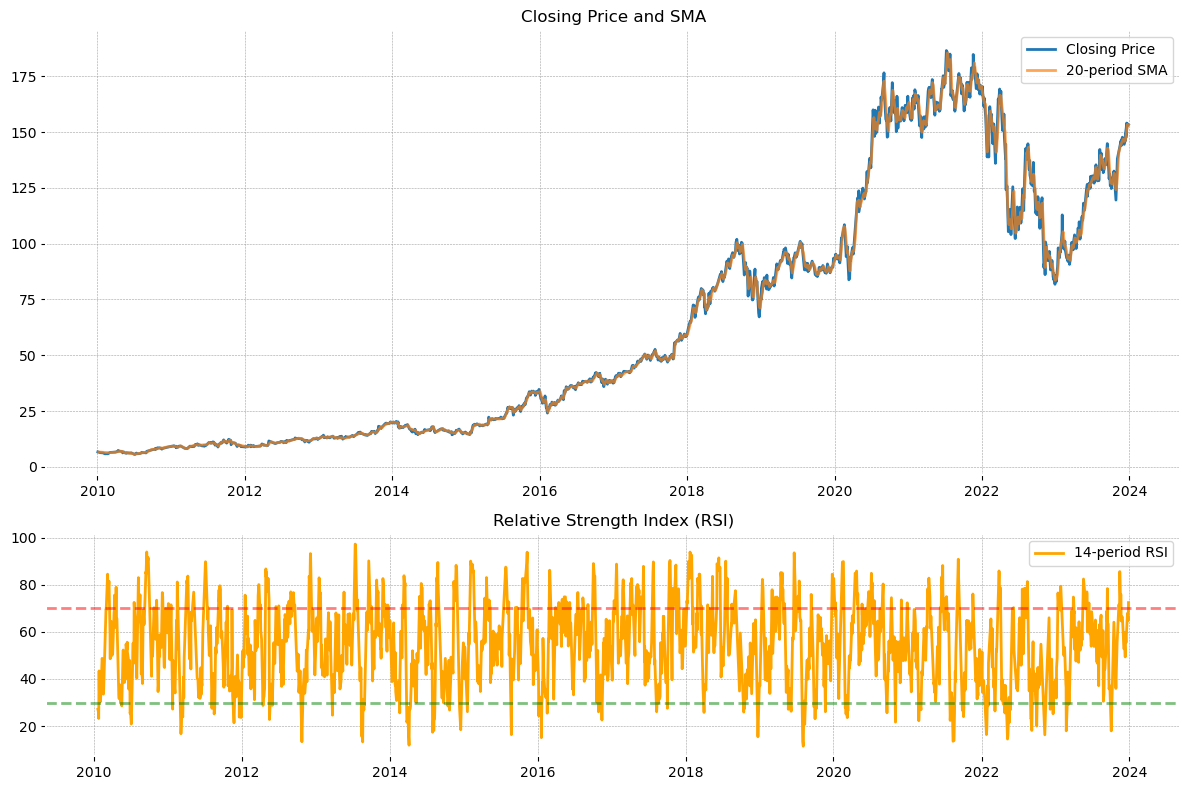

In [280]:
fig, axs = plt.subplots(2, figsize=(12, 8), gridspec_kw={'height_ratios': [2, 1]})

# Plotting the closing price and SMA
axs[0].plot(data['Adj Close'], label='Closing Price')
axs[0].plot(data['SMA'], label='20-period SMA', alpha=0.7)
axs[0].set_title('Closing Price and SMA')
axs[0].legend()

# Plotting the RSI
axs[1].plot(data['RSI'], label='14-period RSI', color='orange')
axs[1].set_title('Relative Strength Index (RSI)')
axs[1].axhline(70, color='red', linestyle='--', alpha=0.5)  # Overbought line
axs[1].axhline(30, color='green', linestyle='--', alpha=0.5)  # Oversold line
axs[1].legend()

plt.tight_layout()
plt.show()


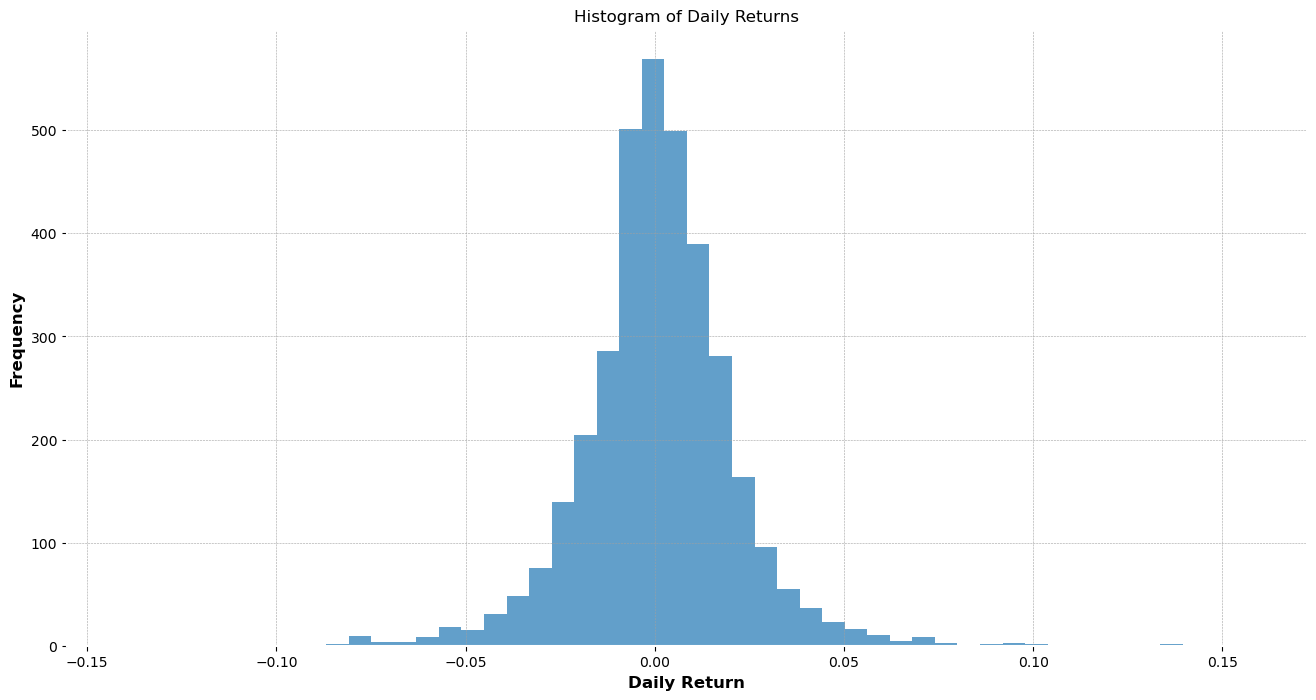

In [281]:
daily_returns = data['Adj Close'].pct_change()

# Drop NaN values
daily_returns = daily_returns.dropna()

# Replace infinite values with NaN, then drop them
daily_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
daily_returns.dropna(inplace=True)

# Check if there are any remaining NaN or infinite values
if not daily_returns.isnull().values.any() and not np.isinf(daily_returns).values.any():
    plt.figure(figsize=(16, 8))
    plt.hist(daily_returns, bins=50, alpha=0.7)
    plt.title('Histogram of Daily Returns')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Data still contains NaN or infinite values.")

In [282]:


#data=data.dropna()
window_size = 5

# Initialize an empty DataFrame for the scaled values
data_scaled = data
columns_to_drop = ['High', 'Low', 'Close','Open']
data_scaled.drop(columns=columns_to_drop, inplace=True)
# Iterate over each column in the DataFrame
for col in ['Volume', 'RSI', '50_MA', '200_MA', 'MACD', 'Signal_Line', 'Middle_Band', 'Upper_Band','Lower_Band', 'SAR', 'OBV', 'CCI', 'ATR', 'Stochastic_oscillator']:
    # Calculate rolling mean and standard deviation
    roll_mean = data_scaled[col].rolling(window=window_size, min_periods=1).mean()
    roll_std = data_scaled[col].rolling(window=window_size, min_periods=1).std()

    # Apply mean-standard deviation scaling
    scaled_col = (data_scaled[col] - roll_mean) / roll_std

    # Handle division by zero (if rolling standard deviation is zero)
    scaled_col[roll_std == 0] = 0  # Or choose another appropriate value

    # Add the scaled column to the scaled DataFrame
    data_scaled[col] = scaled_col
    



In [283]:
data_scaled['Returns']=data_scaled['Adj Close'].pct_change()
data_scaled=data_scaled.dropna()
data_scaled=data_scaled.iloc[2:]
data_scaled.head()

,Adj Close,Volume,SMA,RSI,50_MA,200_MA,SAR,OBV,CCI,ATR,Stochastic_oscillator,MACD,Signal_Line,Middle_Band,Upper_Band,Lower_Band,Returns
Date,,,,,,,,,,,,,,,,,
2010-10-21,8.2485,1.520056,8.1051,1.489496,1.314150,1.229541,-0.957040,0.951307,0.751047,0.796291,0.688627,-0.119150,-1.187638,1.312631,1.435199,1.081413,0.039705
2010-10-22,8.4565,1.360669,8.1500,1.191640,1.356159,1.381875,0.353259,1.590079,0.964631,1.633001,0.860397,1.324031,-0.617291,1.287984,1.695585,-0.293456,0.025217
2010-10-25,8.4500,-0.724958,8.2044,0.312017,1.328352,1.314267,1.288187,0.739508,0.853828,0.592267,0.473900,1.390291,0.628076,1.265623,1.446508,-1.345227,-0.000769
2010-10-26,8.4975,-0.899386,8.3172,1.215004,1.282652,1.289819,1.031890,0.735490,0.161958,-0.433096,0.413011,1.179090,1.567624,1.262862,1.293019,-1.290391,0.005621
2010-10-27,8.3755,-0.696483,8.4056,0.089245,1.236199,1.283445,0.551228,-0.175075,-1.513765,-0.883210,-1.533263,0.767232,1.307853,1.250819,1.127921,-0.934820,-0.014357


In [284]:
def generate_signals(data):
    # Calculate daily returns (pct_change)
    data['Returns'] = data['Adj Close'].pct_change()
    
    # Generate signals: 1 for buy (positive return), -1 for sell (negative return)
    data['Signal'] = np.where(data['Returns'] > 0, 1, -1)
    
    # Drop the first row with NaN return
   # data.dropna(inplace=True)
    data['Signal']=pd.DataFrame(data['Signal'])
    return data

In [285]:
data_scaled = generate_signals(data_scaled)


In [286]:
data_scaled=data_scaled.dropna()

In [287]:
data_scaled['Volatility']=np.log(data_scaled['Returns']+1)
# Select features for clustering (e.g., price changes, volatility)
features = data_scaled[['Volatility','Volume', 'RSI', '50_MA', 'MACD', 'Signal_Line', 'Middle_Band', 'SAR', 'OBV', 'CCI', 'ATR', 'Stochastic_oscillator']]  # Example features

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Assuming 3 market regimes
data_scaled['Regime'] = kmeans.fit_predict(features)

# Display the data with regime labels
data_scaled=data_scaled.dropna()
data_scaled.head()


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


,Adj Close,Volume,SMA,RSI,50_MA,200_MA,SAR,OBV,CCI,ATR,Stochastic_oscillator,MACD,Signal_Line,Middle_Band,Upper_Band,Lower_Band,Returns,Signal,Volatility,Regime
Date,,,,,,,,,,,,,,,,,,,,
2010-10-22,8.4565,1.360669,8.1500,1.191640,1.356159,1.381875,0.353259,1.590079,0.964631,1.633001,0.860397,1.324031,-0.617291,1.287984,1.695585,-0.293456,0.025217,1,0.024904,2
2010-10-25,8.4500,-0.724958,8.2044,0.312017,1.328352,1.314267,1.288187,0.739508,0.853828,0.592267,0.473900,1.390291,0.628076,1.265623,1.446508,-1.345227,-0.000769,-1,-0.000769,2
2010-10-26,8.4975,-0.899386,8.3172,1.215004,1.282652,1.289819,1.031890,0.735490,0.161958,-0.433096,0.413011,1.179090,1.567624,1.262862,1.293019,-1.290391,0.005621,1,0.005606,2
2010-10-27,8.3755,-0.696483,8.4056,0.089245,1.236199,1.283445,0.551228,-0.175075,-1.513765,-0.883210,-1.533263,0.767232,1.307853,1.250819,1.127921,-0.934820,-0.014357,-1,-0.014461,1
2010-10-28,8.3420,-0.587868,8.4243,0.000860,1.221344,1.265764,0.254388,-1.360907,-1.310110,-0.787811,-1.196502,0.028001,1.062704,1.260242,1.076517,-0.529663,-0.004000,-1,-0.004008,1


C:\Users\MSI\AppData\Local\Temp\ipykernel_10620\537462894.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Market Regime')


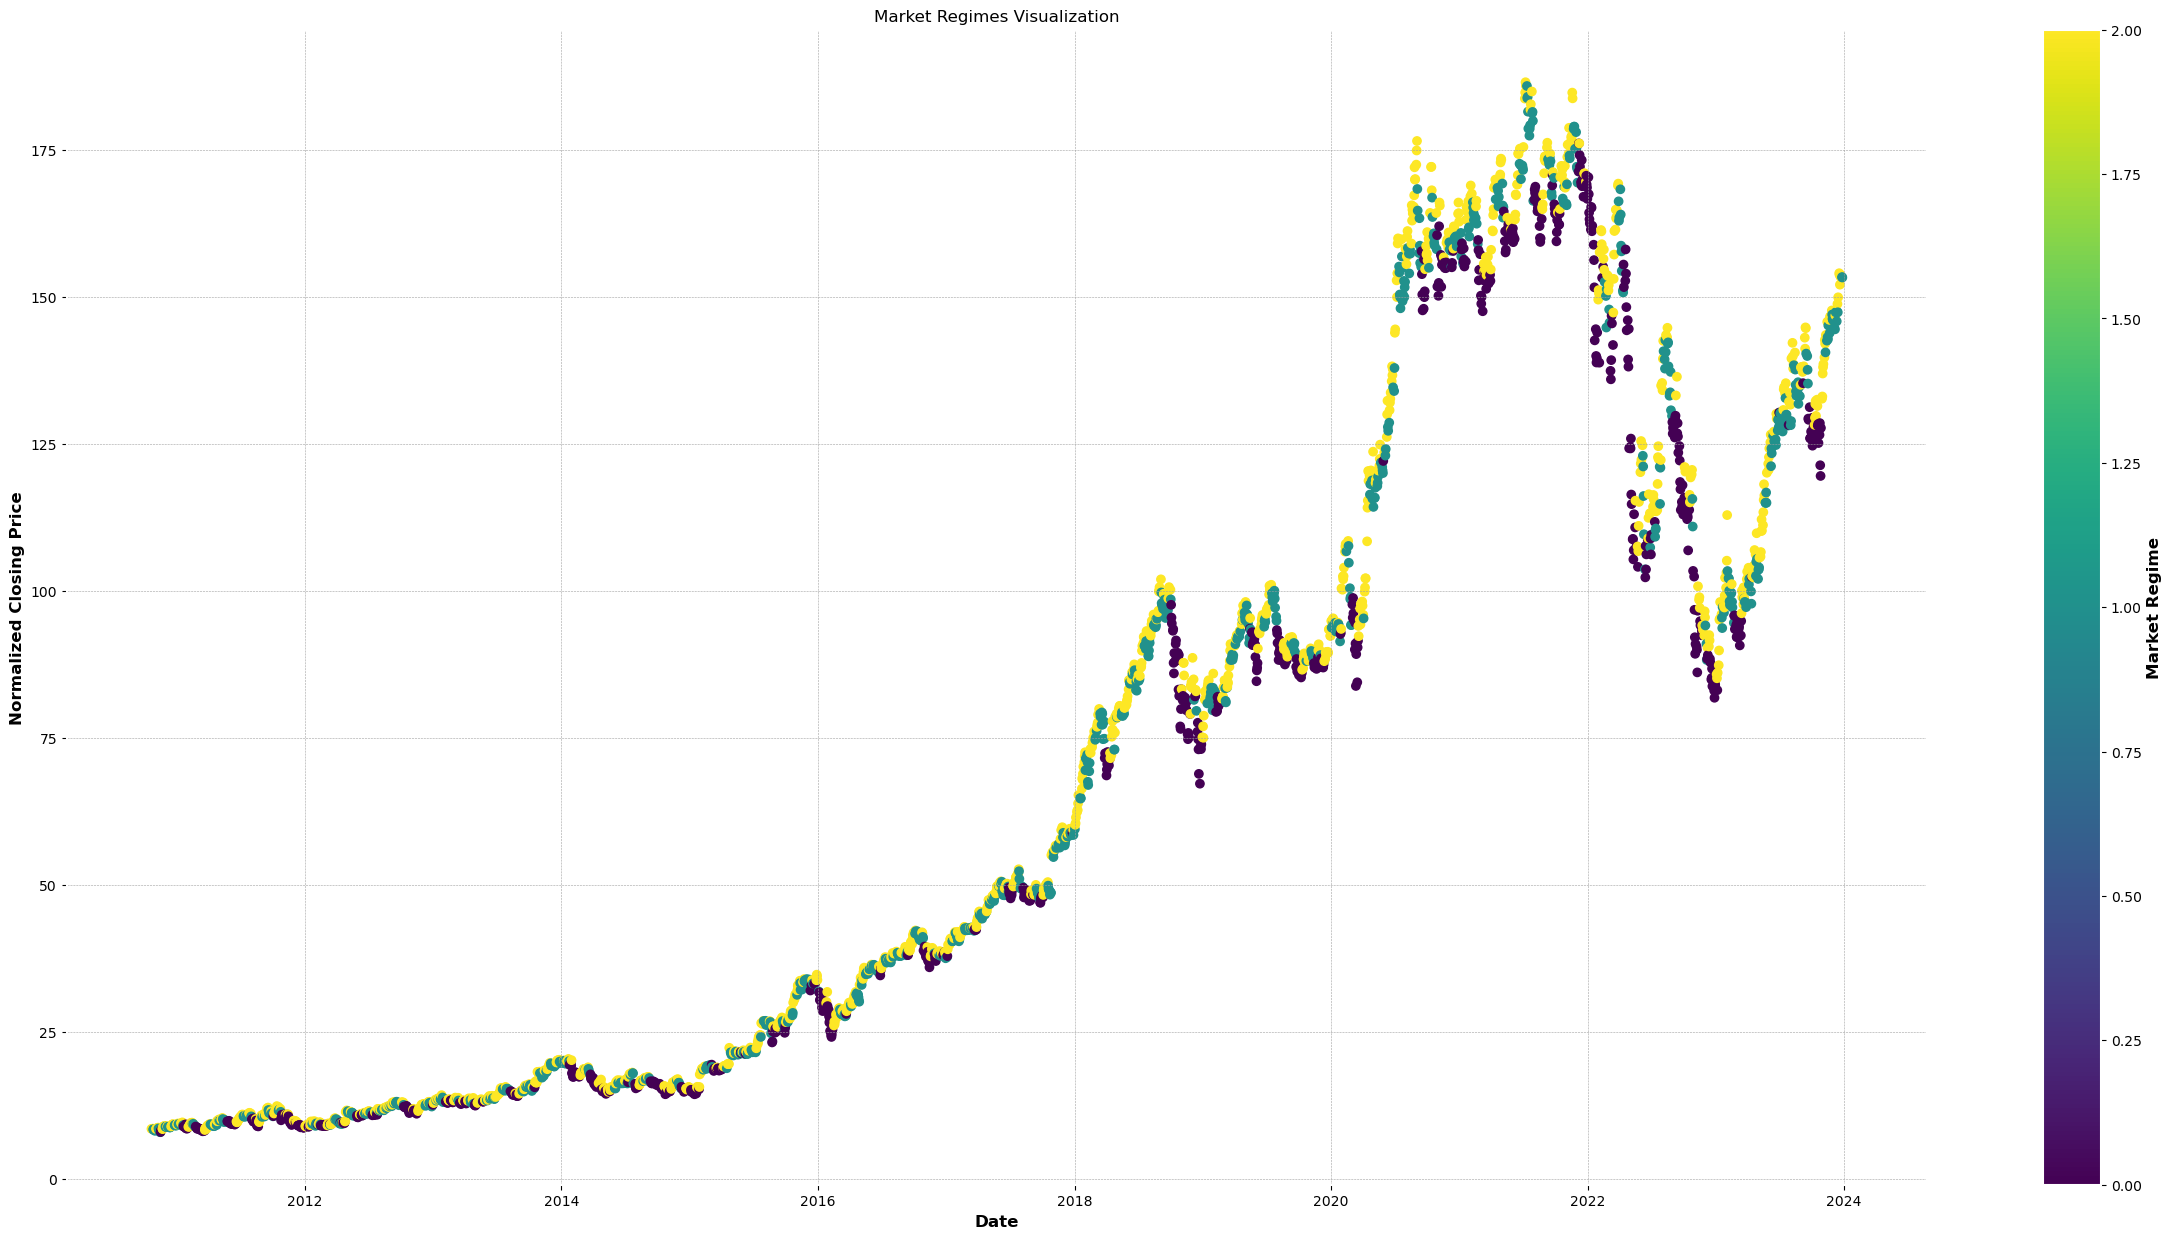

In [288]:
plt.figure(figsize=(30, 15))
plt.scatter(data_scaled.index, data_scaled['Adj Close'], c=data_scaled['Regime'], cmap='viridis')
plt.title('Market Regimes Visualization')
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price')
plt.colorbar(label='Market Regime')
plt.show()


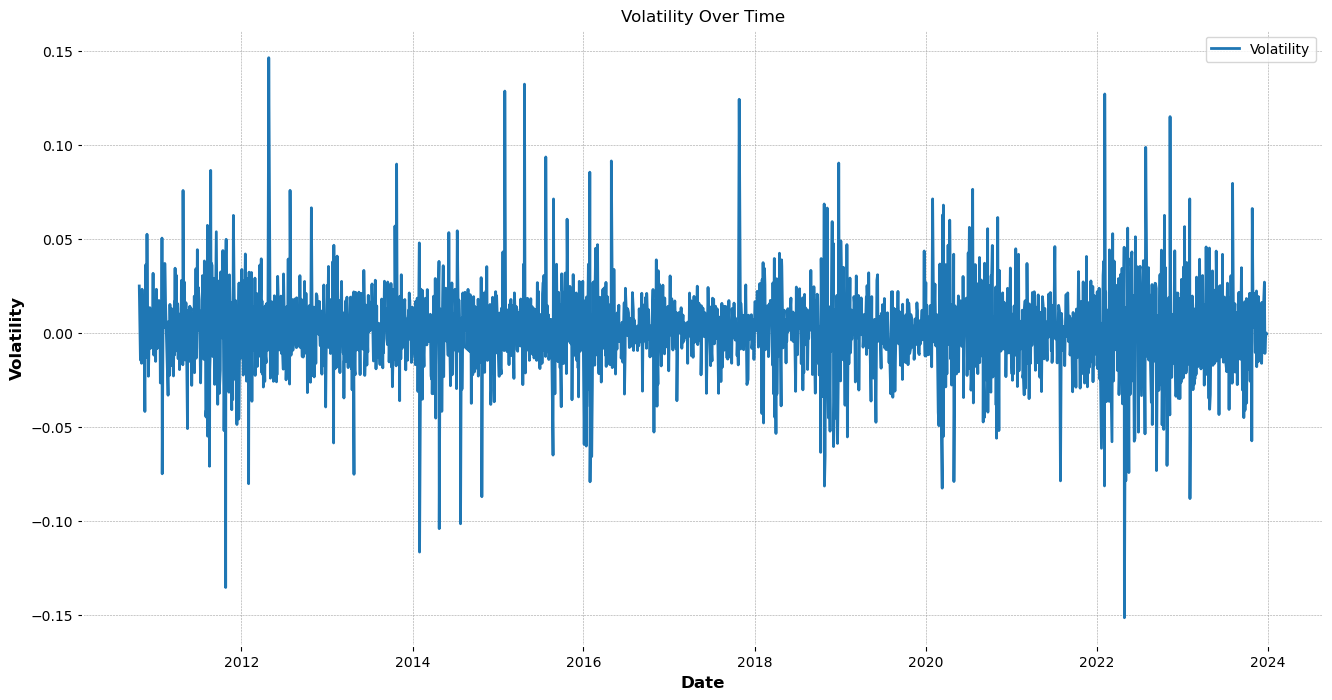

In [289]:




plt.figure(figsize=(16, 8))
plt.plot(data_scaled['Volatility'], label='Volatility')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [290]:
# Split the data into training and testing sets

train_size = int(len(data_scaled) * 0.65)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)


Training Data Shape: (2156, 20)
Testing Data Shape: (1161, 20)


In [291]:
train_data.head()

,Adj Close,Volume,SMA,RSI,50_MA,200_MA,SAR,OBV,CCI,ATR,Stochastic_oscillator,MACD,Signal_Line,Middle_Band,Upper_Band,Lower_Band,Returns,Signal,Volatility,Regime
Date,,,,,,,,,,,,,,,,,,,,
2010-10-22,8.4565,1.360669,8.1500,1.191640,1.356159,1.381875,0.353259,1.590079,0.964631,1.633001,0.860397,1.324031,-0.617291,1.287984,1.695585,-0.293456,0.025217,1,0.024904,2
2010-10-25,8.4500,-0.724958,8.2044,0.312017,1.328352,1.314267,1.288187,0.739508,0.853828,0.592267,0.473900,1.390291,0.628076,1.265623,1.446508,-1.345227,-0.000769,-1,-0.000769,2
2010-10-26,8.4975,-0.899386,8.3172,1.215004,1.282652,1.289819,1.031890,0.735490,0.161958,-0.433096,0.413011,1.179090,1.567624,1.262862,1.293019,-1.290391,0.005621,1,0.005606,2
2010-10-27,8.3755,-0.696483,8.4056,0.089245,1.236199,1.283445,0.551228,-0.175075,-1.513765,-0.883210,-1.533263,0.767232,1.307853,1.250819,1.127921,-0.934820,-0.014357,-1,-0.014461,1
2010-10-28,8.3420,-0.587868,8.4243,0.000860,1.221344,1.265764,0.254388,-1.360907,-1.310110,-0.787811,-1.196502,0.028001,1.062704,1.260242,1.076517,-0.529663,-0.004000,-1,-0.004008,1


In [292]:
test_data.head()

,Adj Close,Volume,SMA,RSI,50_MA,200_MA,SAR,OBV,CCI,ATR,Stochastic_oscillator,MACD,Signal_Line,Middle_Band,Upper_Band,Lower_Band,Returns,Signal,Volatility,Regime
Date,,,,,,,,,,,,,,,,,,,,
2019-05-20,92.948502,-1.780238,93.468100,-0.620188,1.295745,1.172001,0.055967,-0.818393,-0.503999,0.939034,-0.421947,-1.496004,-1.219380,0.017080,1.271727,-0.180076,-0.005366,-1,-0.005381,1
2019-05-21,92.875999,-0.850470,93.642101,-0.121930,1.204115,0.944449,-0.094818,-1.369010,-0.378743,0.766587,-0.754209,-1.389509,-1.258658,-1.535982,-1.018995,-1.448835,-0.000780,-1,-0.000780,0
2019-05-22,92.984001,-1.480788,93.527400,1.088146,1.198163,1.030051,-0.633774,-0.520159,-0.334519,-0.923829,-0.513046,-1.169032,-1.242776,-1.396134,-0.712857,-1.389593,0.001163,1,0.001162,0
2019-05-23,90.774002,0.645751,92.606500,-1.749070,1.138041,0.390237,-1.046940,-1.141235,-1.401011,-1.382909,-1.717600,-1.450074,-1.290380,-1.424974,1.699556,-1.537981,-0.023768,-1,-0.024055,0
2019-05-24,91.164001,-0.587006,92.149301,-0.890397,1.180400,-1.142416,-1.177490,0.187119,-0.354091,-1.501221,-0.790904,-1.336349,-1.304280,-1.473936,-1.074045,-1.329619,0.004296,1,0.004287,0


In [293]:
X_train = train_data[['Volume','SMA','RSI','50_MA','200_MA','SAR','OBV','CCI','ATR','Stochastic_oscillator','MACD','Signal_Line','Middle_Band','Upper_Band','Lower_Band','Volatility']]

# Assuming 'train_data' is your DataFrame and 'features' are your input features
y_train_regime = train_data['Regime']



X_train.head()

,Volume,SMA,RSI,50_MA,200_MA,SAR,OBV,CCI,ATR,Stochastic_oscillator,MACD,Signal_Line,Middle_Band,Upper_Band,Lower_Band,Volatility
Date,,,,,,,,,,,,,,,,
2010-10-22,1.360669,8.1500,1.191640,1.356159,1.381875,0.353259,1.590079,0.964631,1.633001,0.860397,1.324031,-0.617291,1.287984,1.695585,-0.293456,0.024904
2010-10-25,-0.724958,8.2044,0.312017,1.328352,1.314267,1.288187,0.739508,0.853828,0.592267,0.473900,1.390291,0.628076,1.265623,1.446508,-1.345227,-0.000769
2010-10-26,-0.899386,8.3172,1.215004,1.282652,1.289819,1.031890,0.735490,0.161958,-0.433096,0.413011,1.179090,1.567624,1.262862,1.293019,-1.290391,0.005606
2010-10-27,-0.696483,8.4056,0.089245,1.236199,1.283445,0.551228,-0.175075,-1.513765,-0.883210,-1.533263,0.767232,1.307853,1.250819,1.127921,-0.934820,-0.014461
2010-10-28,-0.587868,8.4243,0.000860,1.221344,1.265764,0.254388,-1.360907,-1.310110,-0.787811,-1.196502,0.028001,1.062704,1.260242,1.076517,-0.529663,-0.004008


In [294]:
y_train_regime.head()

Date
2010-10-22    2
2010-10-25    2
2010-10-26    2
2010-10-27    1
2010-10-28    1
Name: Regime, dtype: int32

In [295]:

# Initialize the classifier
clf_regime = RandomForestClassifier()

# Train the classifier
clf_regime.fit(X_train, y_train_regime)

RandomForestClassifier()

In [296]:


# Filter the training data to include only low and medium volatility regimes
regression_data = train_data[(train_data['Regime'] == 0) | (train_data['Regime'] == 1)]

X_regression = regression_data.drop(columns=['Adj Close','Regime','Signal','Returns','Volatility'])
y_ret = regression_data['Returns']  

# Initialize the regressor
regressor = RandomForestRegressor()

# Train the regressor
regressor.fit(X_regression, y_ret)


RandomForestRegressor()

In [297]:

  

estimators = [('sgd', SGDClassifier(loss='modified_huber',shuffle=True, random_state=101)),('ada', make_pipeline(StandardScaler(),AdaBoostClassifier(n_estimators=15,learning_rate=0.5))),
               ('rdg', make_pipeline(StandardScaler(),RidgeClassifier())),('knn', make_pipeline(StandardScaler(),KNeighborsClassifier(algorithm='brute', leaf_size=25, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=55, p=2,
           weights='uniform'))),('logit', make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',C=1.2,solver='liblinear',fit_intercept=True,intercept_scaling=2.1))),('CAT', make_pipeline(StandardScaler(),CatBoostClassifier(iterations=2, learning_rate=1, depth=2)))]

build_model= StackingClassifier(estimators=estimators, final_estimator=SVC())



In [298]:
reg_data = train_data[train_data['Regime'] == 2 ] 

y_sig= reg_data['Signal']

X_reg= reg_data.drop(columns=['Adj Close','Regime','Signal','Returns','Volatility'])

# Building the model for data
lstm_model_alphabet = build_model.fit(X_reg,y_sig)

0:	learn: 0.2776195	total: 787us	remaining: 787us
1:	learn: 0.2065291	total: 1.49ms	remaining: 0us
0:	learn: 0.2860775	total: 649us	remaining: 649us
1:	learn: 0.2189282	total: 1.37ms	remaining: 0us
0:	learn: 0.2737873	total: 732us	remaining: 732us
1:	learn: 0.1925948	total: 1.36ms	remaining: 0us
0:	learn: 0.2840199	total: 643us	remaining: 643us
1:	learn: 0.1838142	total: 1.27ms	remaining: 0us
0:	learn: 0.2784008	total: 1.04ms	remaining: 1.04ms
1:	learn: 0.2080555	total: 2.25ms	remaining: 0us
0:	learn: 0.2901887	total: 626us	remaining: 626us
1:	learn: 0.2233530	total: 1.44ms	remaining: 0us


In [299]:
def apply_strategy(data, clf_regime, model_signal, model_price):
    # Predict the volatility regime
    regime_prediction = clf_regime.predict(data)
    
    # Prepare the array to hold the trading signals
    signals = np.zeros(len(data), dtype=int)

    for i in range(len(data)):
        current_data = data.iloc[i:i+1].drop(columns=['Volatility'])
        if regime_prediction[i] == 2:  # High volatility
            # Use the signal construction model
            signals[i] = np.sign(model_signal.predict(current_data)[0])
        else:  # Low or medium volatility
            # Use the price prediction model to predict the next period's price
            predicted_ret = model_price.predict(current_data)[0]
            # Compare the predicted future price to the current price
            if predicted_ret > 0:
                signals[i] = 1  # Buy if the price is predicted to increase
            else:
                signals[i] = -1  # Sell if the price is predicted to decrease

    return signals

In [300]:
X_test = test_data[['Volume','SMA','RSI','50_MA','200_MA','SAR','OBV','CCI','ATR','Stochastic_oscillator','MACD','Signal_Line','Middle_Band','Upper_Band','Lower_Band','Volatility']]

# Assuming 'train_data' is your DataFrame and 'features' are your input features
y_test_regime = test_data['Regime']



X_test.head()

,Volume,SMA,RSI,50_MA,200_MA,SAR,OBV,CCI,ATR,Stochastic_oscillator,MACD,Signal_Line,Middle_Band,Upper_Band,Lower_Band,Volatility
Date,,,,,,,,,,,,,,,,
2019-05-20,-1.780238,93.468100,-0.620188,1.295745,1.172001,0.055967,-0.818393,-0.503999,0.939034,-0.421947,-1.496004,-1.219380,0.017080,1.271727,-0.180076,-0.005381
2019-05-21,-0.850470,93.642101,-0.121930,1.204115,0.944449,-0.094818,-1.369010,-0.378743,0.766587,-0.754209,-1.389509,-1.258658,-1.535982,-1.018995,-1.448835,-0.000780
2019-05-22,-1.480788,93.527400,1.088146,1.198163,1.030051,-0.633774,-0.520159,-0.334519,-0.923829,-0.513046,-1.169032,-1.242776,-1.396134,-0.712857,-1.389593,0.001162
2019-05-23,0.645751,92.606500,-1.749070,1.138041,0.390237,-1.046940,-1.141235,-1.401011,-1.382909,-1.717600,-1.450074,-1.290380,-1.424974,1.699556,-1.537981,-0.024055
2019-05-24,-0.587006,92.149301,-0.890397,1.180400,-1.142416,-1.177490,0.187119,-0.354091,-1.501221,-0.790904,-1.336349,-1.304280,-1.473936,-1.074045,-1.329619,0.004287


In [301]:
# Classification model evaluation

y_pred_regime = clf_regime.predict(X_test)
print(classification_report(y_test_regime, y_pred_regime))



              precision    recall  f1-score   support

           0       0.96      0.94      0.95       347
           1       0.93      0.93      0.93       335
           2       0.95      0.96      0.95       479

    accuracy                           0.95      1161
   macro avg       0.95      0.94      0.94      1161
weighted avg       0.95      0.95      0.95      1161



In [302]:
regression_test = test_data[(test_data['Regime'] == 0) | (train_data['Regime'] == 1)]

X_regression_test = regression_test.drop(columns=['Adj Close','Regime','Signal','Returns','Volatility'])
y_price_test = regression_test['Adj Close']  # Replace with your actual future price column


C:\Users\MSI\AppData\Local\Temp\ipykernel_10620\3195760415.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  regression_test = test_data[(test_data['Regime'] == 0) | (train_data['Regime'] == 1)]


In [303]:
X_test.columns

Index(['Volume', 'SMA', 'RSI', '50_MA', '200_MA', 'SAR', 'OBV', 'CCI', 'ATR',
       'Stochastic_oscillator', 'MACD', 'Signal_Line', 'Middle_Band',
       'Upper_Band', 'Lower_Band', 'Volatility'],
      dtype='object')

In [304]:
X_regression.columns

Index(['Volume', 'SMA', 'RSI', '50_MA', '200_MA', 'SAR', 'OBV', 'CCI', 'ATR',
       'Stochastic_oscillator', 'MACD', 'Signal_Line', 'Middle_Band',
       'Upper_Band', 'Lower_Band'],
      dtype='object')

In [305]:
# Generate signals based on the strategy
signals= apply_strategy(X_test, clf_regime,build_model, regressor)


In [306]:
signals

array([-1, -1,  1, ..., -1, -1, -1])

In [313]:
signals=np.where(signals == 1, -1, np.where(signals == -1, 1, signals))

In [314]:
def calculate_cumulative_investment_value(signals, stock_prices, initial_investment):
    cash = initial_investment
    stock_held = 0
    investment_value = []

    for i in range(len(signals)):
        price = stock_prices.iloc[i]
        signal = signals[i]
        
        if signal == 1 and cash >= price:  # Buy signal and have enough cash to buy at least one stock
            num_stocks_to_buy = cash // price  # Calculate the number of stocks to buy
            stock_held += num_stocks_to_buy  # Increase the stock held
            cash -= num_stocks_to_buy * price  # Decrease the cash by the amount spent on stocks
        elif signal == -1 and stock_held > 0:  # Sell signal and have stocks to sell
            cash += stock_held * price  # Increase cash by selling all stocks held
            stock_held = 0  # Reset stock held to 0 after selling

        # Calculate current value of investment
        current_value = cash + stock_held * price  # Cash + value of stocks held
        investment_value.append(current_value)  # Append the current value to the investment value list

    return investment_value


In [315]:
initial_inv=100000

In [316]:
portfolio_values = calculate_cumulative_investment_value(signals, test_data['Adj Close'], initial_inv)

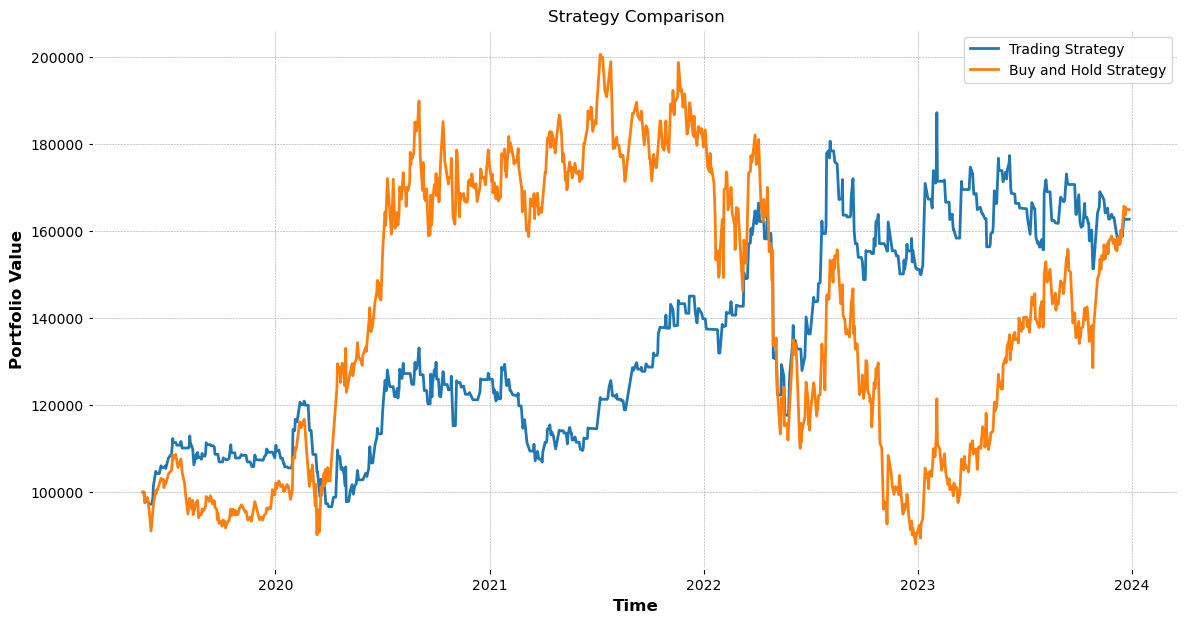

In [317]:
# Compute the buy-and-hold strategy values
buy_and_hold_values = initial_inv * test_data['Adj Close'] / test_data['Adj Close'].iloc[0]

# Plot the portfolio values of both strategies
plt.figure(figsize=(14, 7))
plt.plot(test_data.index,portfolio_values, label='Trading Strategy')
plt.plot(test_data.index,buy_and_hold_values.values, label='Buy and Hold Strategy')
plt.title('Strategy Comparison')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()


In [318]:
# Calculate daily returns for both strategies
strategy_returns = np.diff(portfolio_values) / portfolio_values[:-1]
buy_and_hold_returns = test_data['Adj Close'].pct_change().dropna()

# Calculate the Sharpe ratio for both strategies
strategy_sharpe_ratio = np.mean(strategy_returns) / np.std(strategy_returns) * np.sqrt(252)
buy_and_hold_sharpe_ratio = np.mean(buy_and_hold_returns) / np.std(buy_and_hold_returns) * np.sqrt(252)

print(f"Trading Strategy Sharpe Ratio: {strategy_sharpe_ratio}")
print(f"Buy and Hold Strategy Sharpe Ratio: {buy_and_hold_sharpe_ratio}")




Trading Strategy Sharpe Ratio: 0.5497936514619188
Buy and Hold Strategy Sharpe Ratio: 0.48272623337810533
